In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.linear_model import LinearRegression
import matplotlib as plt

In [7]:
file=pd.read_csv("dataset1.csv")

In [8]:
dummies=pd.get_dummies(file.kesimpulan)

In [9]:
file1=pd.concat([file,dummies],axis='columns')

In [10]:
file1


,id no,berat,tinggi(m),umur,gender,aktivitas,berat ideal,kesimpulan,kesimpulan1,latihan,lari,normal,over weight,under weight
0,1,29.44,1.6,16.0,0.0,0.0,18.4000,under weight,under weight,menambah makanan,0,0,0,1
1,2,29.66,1.6,16.0,0.0,0.0,18.5375,normal,normal,menjaga bentuk tubuh,0,1,0,0
2,3,36.64,1.6,16.0,0.0,0.0,22.9000,normal,normal,menjaga bentuk tubuh,0,1,0,0
3,4,36.80,1.6,16.0,0.0,0.0,23.0000,over weight,over weight,lari 100 m,100,0,1,0
4,5,39.84,1.6,16.0,0.0,0.0,24.9000,over weight,over weight,lari 500 m,500,0,1,0
5,6,40.00,1.6,16.0,0.0,0.0,25.0000,over weight,obes1,lari 1 Km dan berdiet,1000,0,1,0
6,7,47.84,1.6,16.0,0.0,0.0,29.9000,over weight,obes1,lari 1.5Km dan berdiet,1500,0,1,0
7,8,48.00,1.6,16.0,0.0,0.0,30.0000,over weight,obes2,lari 2 Km dan berdiet,2000,0,1,0
8,9,80.00,1.6,16.0,0.0,0.0,50.0000,over weight,obes2,lari2 Km dan berdiet,2000,0,1,0
9,10,29.44,1.6,16.0,0.0,1.0,18.4000,under weight,under weight,menambah makanan,0,0,0,1


In [11]:
final=file1.drop(['id no','kesimpulan','kesimpulan1','latihan','normal'],axis='columns')

In [12]:
final

,berat,tinggi(m),umur,gender,aktivitas,berat ideal,lari,over weight,under weight
0,29.44,1.6,16.0,0.0,0.0,18.4000,0,0,1
1,29.66,1.6,16.0,0.0,0.0,18.5375,0,0,0
2,36.64,1.6,16.0,0.0,0.0,22.9000,0,0,0
3,36.80,1.6,16.0,0.0,0.0,23.0000,100,1,0
4,39.84,1.6,16.0,0.0,0.0,24.9000,500,1,0
5,40.00,1.6,16.0,0.0,0.0,25.0000,1000,1,0
6,47.84,1.6,16.0,0.0,0.0,29.9000,1500,1,0
7,48.00,1.6,16.0,0.0,0.0,30.0000,2000,1,0
8,80.00,1.6,16.0,0.0,0.0,50.0000,2000,1,0
9,29.44,1.6,16.0,0.0,1.0,18.4000,0,0,1


In [13]:
x=final.iloc[:,:-3].values
y=final.iloc[:,6:9].values

In [14]:
x

array([[29.44  ,  1.6   , 16.    ,  0.    ,  0.    , 18.4   ],
       [29.66  ,  1.6   , 16.    ,  0.    ,  0.    , 18.5375],
       [36.64  ,  1.6   , 16.    ,  0.    ,  0.    , 22.9   ],
       [36.8   ,  1.6   , 16.    ,  0.    ,  0.    , 23.    ],
       [39.84  ,  1.6   , 16.    ,  0.    ,  0.    , 24.9   ],
       [40.    ,  1.6   , 16.    ,  0.    ,  0.    , 25.    ],
       [47.84  ,  1.6   , 16.    ,  0.    ,  0.    , 29.9   ],
       [48.    ,  1.6   , 16.    ,  0.    ,  0.    , 30.    ],
       [80.    ,  1.6   , 16.    ,  0.    ,  0.    , 50.    ],
       [29.44  ,  1.6   , 16.    ,  0.    ,  1.    , 18.4   ],
       [29.66  ,  1.6   , 16.    ,  0.    ,  1.    , 18.5375],
       [36.64  ,  1.6   , 16.    ,  0.    ,  1.    , 22.9   ],
       [36.8   ,  1.6   , 16.    ,  0.    ,  1.    , 23.    ],
       [39.84  ,  1.6   , 16.    ,  0.    ,  1.    , 24.9   ],
       [40.    ,  1.6   , 16.    ,  0.    ,  1.    , 25.    ],
       [47.84  ,  1.6   , 16.    ,  0.    ,  1.    , 29

In [15]:
np.asarray(x)
with np.printoptions(precision=3, suppress=True):
    print(x)

[[29.44   1.6   16.     0.     0.    18.4  ]
 [29.66   1.6   16.     0.     0.    18.538]
 [36.64   1.6   16.     0.     0.    22.9  ]
 [36.8    1.6   16.     0.     0.    23.   ]
 [39.84   1.6   16.     0.     0.    24.9  ]
 [40.     1.6   16.     0.     0.    25.   ]
 [47.84   1.6   16.     0.     0.    29.9  ]
 [48.     1.6   16.     0.     0.    30.   ]
 [80.     1.6   16.     0.     0.    50.   ]
 [29.44   1.6   16.     0.     1.    18.4  ]
 [29.66   1.6   16.     0.     1.    18.538]
 [36.64   1.6   16.     0.     1.    22.9  ]
 [36.8    1.6   16.     0.     1.    23.   ]
 [39.84   1.6   16.     0.     1.    24.9  ]
 [40.     1.6   16.     0.     1.    25.   ]
 [47.84   1.6   16.     0.     1.    29.9  ]
 [48.     1.6   16.     0.     1.    30.   ]
 [80.     1.6   16.     0.     1.    50.   ]
 [29.44   1.6   16.     0.     2.    18.4  ]
 [29.66   1.6   16.     0.     2.    18.538]
 [36.64   1.6   16.     0.     2.    22.9  ]
 [36.8    1.6   16.     0.     2.    23.   ]
 [39.84   

In [38]:
height=int(input("please enter your height:"))
mass=int(input("please enter your mass:"))
height1 = height/100
bmi=mass/(height1*height1)
print("your bmi:",bmi)

please enter your height:187
please enter your mass:85
your bmi: 24.307243558580453


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  


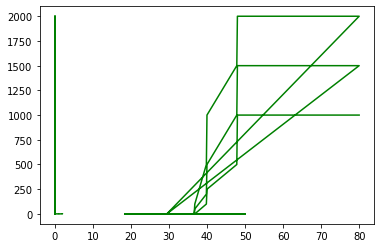

In [39]:
from matplotlib import pyplot as plt
plt.plot(x,y,'g')

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
reg=LinearRegression()
reg=reg.fit(x_train,y_train)

In [30]:
reg.coef_

array([[ 5.07491122e+14,  2.94372417e+13,  6.64404297e+00,
         0.00000000e+00, -2.54526496e+02, -8.11985796e+14],
       [ 7.22692452e+11,  4.19200878e+10,  9.46140289e-03,
         0.00000000e+00, -2.73384935e-02, -1.15630792e+12],
       [ 1.14010233e+12,  6.61321282e+10,  1.49250031e-02,
         0.00000000e+00, -1.78090519e-02, -1.82416373e+12]])

In [31]:
r2_score=reg.score(x,y)
print(r2_score)

0.6513057211192442


In [32]:
reg.predict([[29.66,1.6,16,0,0,18.4]])

array([[1.11648047e+14, 1.58992339e+11, 2.50822513e+11]])

In [33]:
a=reg.predict(x_test)

In [34]:
print(x_test,a)

[[36.64  1.6  16.    0.    0.   22.9 ]
 [47.84  1.6  16.    0.    2.   29.9 ]
 [40.    1.6  16.    0.    1.   25.  ]
 [80.    1.6  16.    0.    1.   50.  ]
 [40.    1.6  16.    0.    0.   25.  ]
 [36.64  1.6  16.    0.    1.   22.9 ]] [[ 5.99031250e+02  5.81687927e-01  2.00927734e-01]
 [ 4.99031250e+02  7.49656677e-01  5.24902344e-02]
 [ 4.63031250e+02  6.16844177e-01  1.46240234e-01]
 [ 1.90703125e+03  1.40590668e+00 -2.20947266e-01]
 [ 7.19031250e+02  6.44187927e-01  1.61865234e-01]
 [ 3.43031250e+02  5.54344177e-01  1.85302734e-01]]


In [35]:
y


array([[   0,    0,    1],
       [   0,    0,    0],
       [   0,    0,    0],
       [ 100,    1,    0],
       [ 500,    1,    0],
       [1000,    1,    0],
       [1500,    1,    0],
       [2000,    1,    0],
       [2000,    1,    0],
       [   0,    0,    1],
       [   0,    0,    0],
       [   0,    0,    0],
       [  50,    1,    0],
       [ 200,    1,    0],
       [ 500,    1,    0],
       [1000,    1,    0],
       [1500,    1,    0],
       [1500,    1,    0],
       [   0,    0,    1],
       [   0,    0,    0],
       [   0,    0,    0],
       [   0,    1,    0],
       [ 100,    1,    0],
       [ 250,    1,    0],
       [ 500,    1,    0],
       [1000,    1,    0],
       [1000,    1,    0]], dtype=int64)